<a href="https://colab.research.google.com/github/maengg/Kaggle_Kernel_Study/blob/main/Titanic_Dataset_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 데이터 가져오기.
from google.colab import files
upload = files.upload()

Saving test (1).csv to test (1).csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib의 기본 스타일 말고 seaborn 스타일로 사용하겠다는 뜻.
plt.style.use('seaborn')
# font_size 계속 변경하기 힘드니 plot의 모든 그래프의 폰트를 일정 크기로 맞춘 것, 2.5 정도하면 크게 나온다고 함.
sns.set(font_scale=2.5)

# 데이터셋의 결측치를 쉽게 보여주는 라이브러리.
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib로 시각화한 그래프를 노트북에서 바로 볼 수 있게 해준다.
%matplotlib inline

In [6]:
# 데이터셋 확인.

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test (1).csv')

In [7]:
df_train.head()
# 카테고리 데이터가 순서정보를 담고 있는지 아닌지

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.shape

(891, 12)

In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
# 각 컬럼의 결측치가 몇개 있는지 percent로 보기 위함.
for col in df_train.columns:
  msg = 'column: {:>10}  Percent of NaN value: {: .2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)

column: PassengerId  Percent of NaN value:  0.00%
column:   Survived  Percent of NaN value:  0.00%
column:     Pclass  Percent of NaN value:  0.00%
column:       Name  Percent of NaN value:  0.00%
column:        Sex  Percent of NaN value:  0.00%
column:        Age  Percent of NaN value:  19.87%
column:      SibSp  Percent of NaN value:  0.00%
column:      Parch  Percent of NaN value:  0.00%
column:     Ticket  Percent of NaN value:  0.00%
column:       Fare  Percent of NaN value:  0.00%
column:      Cabin  Percent of NaN value:  77.10%
column:   Embarked  Percent of NaN value:  0.22%


In [14]:
# 각 컬럼의 결측치가 몇개 있는지 percent로 보기 위함.
for col in df_test.columns:
  msg = 'column: {:>10}  Percent of NaN value: {: .2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
  print(msg)

column: PassengerId  Percent of NaN value:  0.00%
column:     Pclass  Percent of NaN value:  0.00%
column:       Name  Percent of NaN value:  0.00%
column:        Sex  Percent of NaN value:  0.00%
column:        Age  Percent of NaN value:  20.57%
column:      SibSp  Percent of NaN value:  0.00%
column:      Parch  Percent of NaN value:  0.00%
column:     Ticket  Percent of NaN value:  0.00%
column:       Fare  Percent of NaN value:  0.24%
column:      Cabin  Percent of NaN value:  78.23%
column:   Embarked  Percent of NaN value:  0.00%


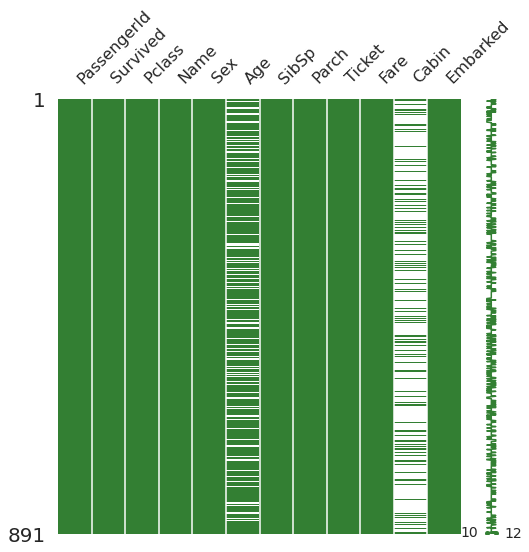

In [15]:
# 결측치가 컬럼별로 어느정도 있는지 시각화. (빈칸이 결측치)
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8), color=(0.2,0.5,0.2))

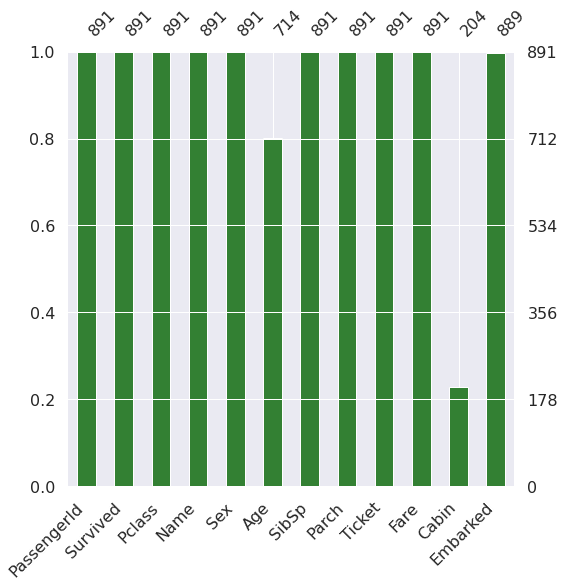

In [16]:
# bar는 직접적인 percent와 갯수를 보여줌.
msno.bar(df=df_train.iloc[:,:],figsize=(8,8), color=(0.2,0.5,0.2))

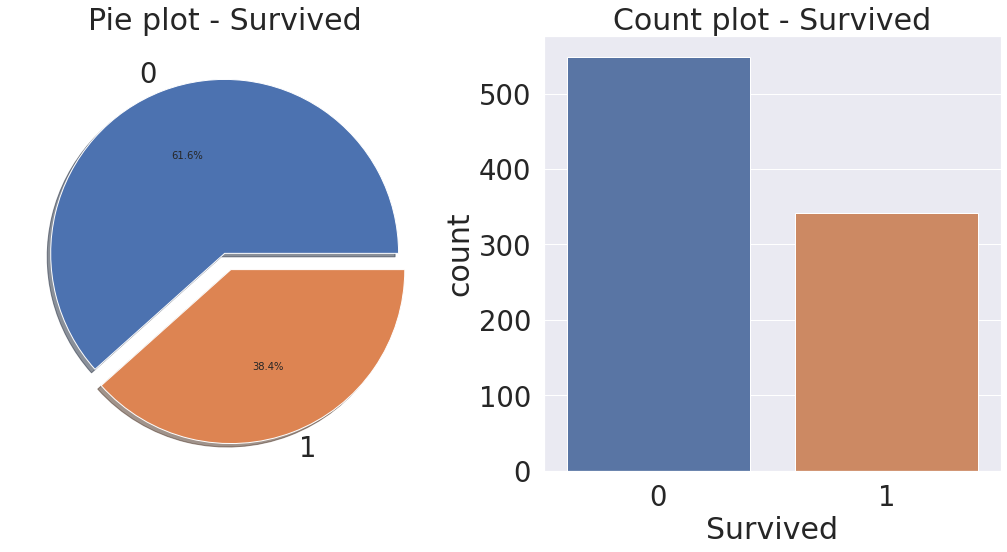

In [32]:
# 타겟 데이터의 분포를 확인해서 불균형 데이터인지 확인. (타겟 데이터의 분포에 따라 평가의 기준이 달라진다.)

f, ax = plt.subplots(1,2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

# **EDA**

### 2.1 Pclass

In [37]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [50]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


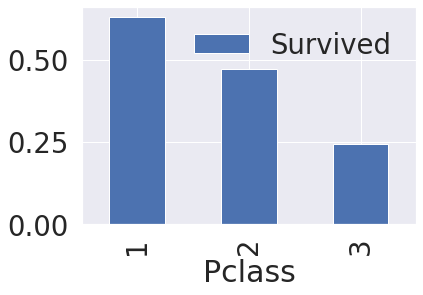

In [51]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by ='Survived', ascending=False).plot.bar()

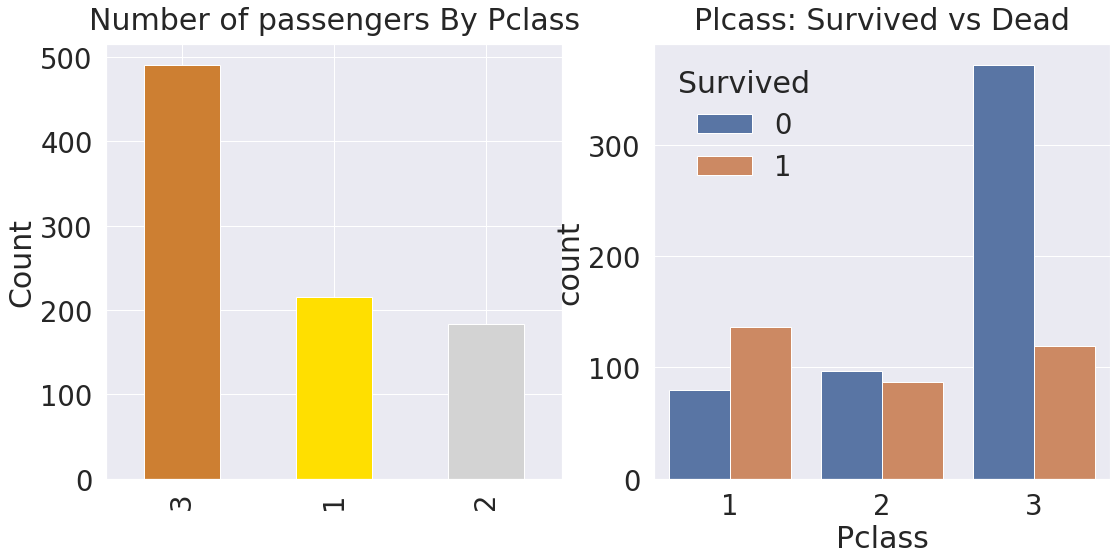

In [57]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Plcass: Survived vs Dead', y=y_position)
plt.show()